## Resnet-ResidualBlock

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.utils import plot_model

We define the residual_block function that represents a single residual block in a ResNet. It takes an input tensor inputs and the number of filters filters as arguments. The function applies two convolutional layers with batch normalization and ReLU activation. Then, it adds the input tensor to the output of the second convolutional layer to create the skip connection. Finally, an activation function is applied to the skip connection.

In [2]:
def residual_block(inputs, filters):
    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    #for compatibility
    if inputs.shape[-1] != filters:
        inputs = Conv2D(filters, kernel_size=(1, 1), padding='same')(inputs)
    
    # Skip connection
    skip = Add()([x, inputs])
    skip = Activation('relu')(skip)
    
    
    return skip

In [3]:
# Input shape
input_shape = (32, 32, 3)

# Input layer
inputs = Input(shape=input_shape)

# Residual block
x = residual_block(inputs, filters=64)

# Create model
model = Model(inputs, x)


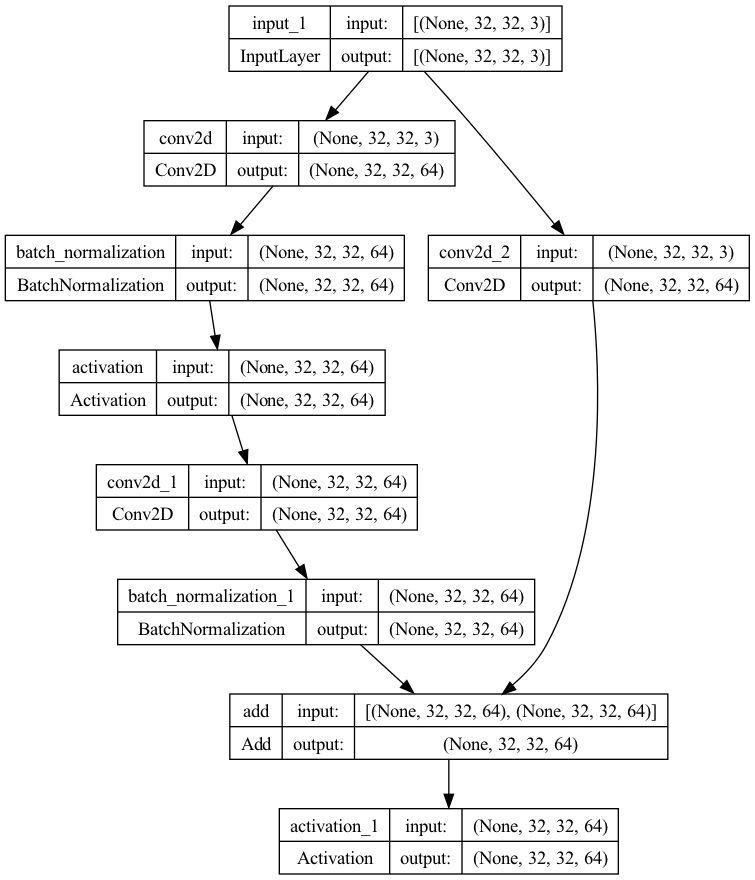

In [4]:
plot_model(model,show_shapes = True, show_layer_names = True)

In [5]:
# Display model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 64)           0         ['batch_normalization[0][0